# **Bitcoin Prediction Modell**

---

### **Group Members:**  

1. Marvin Bullinger, 21172212
2. Mostafa Shehadeh, 20872184

---

### **Overview:**  
This Jupyter Textbook covers the following topics:  
1. Problem Introduction  
2. Description of the Data  
3. Methods  
4. Results  
5. Conclusions  
6. Bibliography  

---

### **Due Date: 02.12.2024**

---


# **Problem Introduction**

The volatile nature of Bitcoin makes it challenging for investors to make informed decisions about when to buy or sell, leading to significant risks and missed opportunities. This limits user ability to navigate the cryptocurrency market effectively.

This Machine Learning algorithm aims to provide clarity and short-term predictions around Bitcoin's price. It uses both qualitative data, such as financial news, expert analyses, and market sentiment, and historical data from related assets like gold and Ethereum.

Through the analysis of qualitative and historical data, combined with Machine Learning techniques, our program will produce educated price predictions. This empowers users to make more informed decisions, reduce uncertainty, and optimize their profit making potential.

---


# **Description of the Data**


8 total related commodities and key factors will be used to predict the price of Bitcoin

1. Historical Prices: Essential for model training, historical data provides insight on Bitcoin performance and trends

2. Bitcoin Trading Volume: High trading volume signals positive performance, while low volume indicates unsustainable, downwards trends.

3. Crypto Market Sentiment and Global Events: Economic events such as recessions can push people to more decentralized currencies. Using tools like CryptoFear, we can assess how market sentiment affects prices.

4. Interest Rates and Inflation: Low interest rates and high inflation can drive investors toward Bitcoin as a hedge, driving trading volume. Conversely, high interest rates and low inflation can shift demand away from Bitcoin, lowering performance.

5. Gold Prices: Gold price performance can signal investor interest in safe assets. Rising gold prices can lead to investors seeking alternative assets such as Bitcoin.

6. Ethereum Prices: As the crypto currency with the second highest trading volume behind Bitcoin, Ethereum and Bitcoin prices frequently move in tandem. Increased Ethereum activity can indicate heightened interest in the crypto sector, boosting Bitcoin demand.

7. Global Energy Prices: Rising energy costs directly affect Bitcoin mining profitability, influencing its price.

8. War Sentiment: Geopolitical conflicts can push investors toward decentralized assets like Bitcoin, highlighting its appeal as a hedge against instability.

In [ ]:
!pip3 install yfinance
!pip3 install numpy
!pip3 install xgboost
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install seaborn

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
import requests
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb



When initialized, the program creates 8 separate dataframes representing the key factors above. All dataframes collect monthly performance starting from 2010.

Monthly opening prices for gold, Etherium, Bitcoin and Brent Crude Oil and WTI Crude Oil (used to predict electricity prices) from 2010 onwards are extracted from Yahoo Finance's public library into individual dataframes. These 4 assets are concatenated into one 'asset' dataframe.




In [ ]:
btc_ticker = 'BTC-USD'
btc_data = yf.Ticker(btc_ticker)
btc_df = btc_data.history(period="10y")
btc_price_df = btc_df[['Open', 'High', 'Low', 'Close', 'Volume']]
btc_price_df.index = btc_price_df.index.tz_localize(None)

gold_ticker = 'GC=F'
gold_data = yf.Ticker(gold_ticker)
gold_df = gold_data.history(period="10y")
gold_price_df = gold_df[['Open']].rename(columns={'Open': 'Open_Gold'})
gold_price_df.index = gold_price_df.index.tz_localize(None)

wti_ticker = 'CL=F'
wti_data = yf.Ticker(wti_ticker)
wti_df = wti_data.history(period="10y")
wti_price_df = wti_df[['Open']].rename(columns={'Open': 'Open_WTI'})
wti_price_df.index = wti_price_df.index.tz_localize(None)

brent_ticker = 'BZ=F'
brent_data = yf.Ticker(brent_ticker)
brent_df = brent_data.history(period="10y")
brent_price_df = brent_df[['Open']].rename(columns={'Open': 'Open_Brent'})
brent_price_df.index = brent_price_df.index.tz_localize(None)

eth_ticker = 'ETH-USD'
eth_data = yf.Ticker(eth_ticker)
eth_df = eth_data.history(period="10y")
eth_price_df = eth_df[['Open']].rename(columns={'Open': 'Open_ETH'})
eth_price_df.index = eth_price_df.index.tz_localize(None)

asset_prices = pd.concat([gold_price_df, wti_price_df, brent_price_df, eth_price_df, btc_price_df], axis=1)

display(asset_prices)

,Open_Gold,Open_WTI,Open_Brent,Open_ETH,Open,High,Low,Close,Volume
Date,,,,,,,,,
2014-12-01,1160.000000,66.000000,70.190002,NaN,378.248993,383.661987,376.669006,379.244995,11763000
2014-12-02,1212.300049,69.239998,72.660004,NaN,379.250000,384.037994,377.863007,381.315002,12364100
2014-12-03,1198.099976,67.599998,71.120003,NaN,381.721985,383.026001,374.346008,375.010010,13340100
2014-12-04,1208.199951,67.400002,70.250000,NaN,375.717987,378.654999,367.759003,369.604004,14529600
2014-12-05,1203.099976,66.800003,69.389999,NaN,369.441986,379.191986,365.756012,376.854004,15181800
...,...,...,...,...,...,...,...,...,...
2024-11-27,2633.500000,68.910004,72.940002,3326.029053,91978.140625,97361.179688,91778.664062,95962.531250,71133452438
2024-11-28,2636.399902,68.769997,72.919998,3656.609619,95954.945312,96650.203125,94677.351562,95652.468750,52260008261
2024-11-29,2636.399902,68.769997,72.379997,3579.910645,95653.953125,98693.171875,95407.882812,97461.523438,54968682476


Next, monthly inflaction rate in the USA starting from 2014 is gathered using an API from the Federal Reserve Bank Of St. Louis, which is then input into a dataframe.

In [ ]:
API_KEY = '4de4255ce0b5c6654bf3d915537e894e'
BASE_URL = 'https://api.stlouisfed.org/fred/series/observations'

def fetch_fred_data(series_id, start_date=None, end_date=None):
    if start_date is None:
        start_date = (datetime.now() - timedelta(days=365 * 10)).strftime('%Y-%m-%d')
    if end_date is None:
        end_date = datetime.today().strftime('%Y-%m-%d')

    params = {
        'series_id': series_id,
        'api_key': API_KEY,
        'file_type': 'json',
        'observation_start': start_date,
        'observation_end': end_date
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if 'observations' not in data:
        print("Error fetching data:", data)
        return None

    df = pd.DataFrame(data['observations'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['value'] = pd.to_numeric(df['value'], errors='coerce')  # Convert values to numeric
    return df[['value']]

# Fetch data
start_date = (datetime.now() - timedelta(days=365 * 10)).strftime('%Y-%m-%d')
fed_funds_rate = fetch_fred_data(series_id='FEDFUNDS', start_date=start_date).rename(columns={'value': 'Fed Funds Rate'})
cpi_data = fetch_fred_data(series_id='CPIAUCSL', start_date=start_date).rename(columns={'value': 'CPI'})

# Calculate Inflation Rate
cpi_data['Inflation Rate'] = cpi_data['CPI'].pct_change() * 100

# Combine data
economic_data = pd.merge(fed_funds_rate, cpi_data['Inflation Rate'], left_index=True, right_index=True, how='outer')

# Adjust to daily frequency and forward-fill
economic_data = economic_data.asfreq('D').ffill()

# Align to the desired start date
desired_start_date = (datetime.now() - timedelta(days=365 * 10)).strftime('%Y-%m-%d')
economic_data = economic_data.loc[desired_start_date:]

# Display the updated DataFrame
print("Economic Data starts from:", economic_data.index.min())
display(economic_data)

Economic Data starts from: 2014-12-04 00:00:00


,Fed Funds Rate,Inflation Rate
date,,
2014-12-04,0.12,NaN
2014-12-05,0.12,NaN
2014-12-06,0.12,NaN
2014-12-07,0.12,NaN
2014-12-08,0.12,NaN
...,...,...
2024-09-27,5.13,0.179867
2024-09-28,5.13,0.179867
2024-09-29,5.13,0.179867


Following this, crypto market sentiment is is extracted into a database from the 'Crypto Fear & Greed Index' database (CITATION HERE). This website contains a chart of crypto sentiment represented by a percentage (0% being poor sentiment, 100% being high sentiment) calculated by overall crypto trade volume. This data is calculated daily, and must be adjusted to fit into a monthly schema.

In [ ]:
# this was taken from this website
# Add
# https://alternative.me/crypto/fear-and-greed-index/



url = 'https://api.alternative.me/fng/?limit=3650'  # Assuming 10 years of data
response = requests.get(url)
data = response.json()

# Process Fear & Greed Index
fng_df = pd.DataFrame(data['data'])
fng_df['date'] = pd.to_datetime(fng_df['timestamp'].astype(int), unit='s')
fng_df.set_index('date', inplace=True)
fng_df = fng_df[['value']].rename(columns={'value': 'Fear & Greed Index'})
fng_df = fng_df.asfreq('D').ffill()
display(fng_df)

,Fear & Greed Index
date,
2018-02-01,30
2018-02-02,15
2018-02-03,40
2018-02-04,24
2018-02-05,11
...,...
2024-11-27,75
2024-11-28,77
2024-11-29,78


Once all required data fields have been collected, they are combined into one large database (displayed below)

In [ ]:
final_df = pd.concat([fng_df, economic_data, asset_prices], axis=1, join='outer')
final_df.index.name = 'Date'
display(final_df)

,Fear & Greed Index,Fed Funds Rate,Inflation Rate,Open_Gold,Open_WTI,Open_Brent,Open_ETH,Open,High,Low,Close,Volume
Date,,,,,,,,,,,,
2014-12-01,NaN,NaN,NaN,1160.000000,66.000000,70.190002,NaN,378.248993,383.661987,376.669006,379.244995,11763000
2014-12-02,NaN,NaN,NaN,1212.300049,69.239998,72.660004,NaN,379.250000,384.037994,377.863007,381.315002,12364100
2014-12-03,NaN,NaN,NaN,1198.099976,67.599998,71.120003,NaN,381.721985,383.026001,374.346008,375.010010,13340100
2014-12-04,NaN,0.12,NaN,1208.199951,67.400002,70.250000,NaN,375.717987,378.654999,367.759003,369.604004,14529600
2014-12-05,NaN,0.12,NaN,1203.099976,66.800003,69.389999,NaN,369.441986,379.191986,365.756012,376.854004,15181800
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-27,75,NaN,NaN,2633.500000,68.910004,72.940002,3326.029053,91978.140625,97361.179688,91778.664062,95962.531250,71133452438
2024-11-28,77,NaN,NaN,2636.399902,68.769997,72.919998,3656.609619,95954.945312,96650.203125,94677.351562,95652.468750,52260008261
2024-11-29,78,NaN,NaN,2636.399902,68.769997,72.379997,3579.910645,95653.953125,98693.171875,95407.882812,97461.523438,54968682476


---

# **Analysis**



### Chosen ML Algorithm

Two machine learning models were selected: Linear Regression and XGBoost.

Linear Regression creates simple, linear relationships between features, which was used to provide a basic understanding of how the data relates to itself. The output of this model was used as a baseline to be improved upon.

XGBoost, is a more advanced neural network able to capture non linear relationships and understand feature relationships more effectively than a linear model. XGBoost was used as a follow up to the basic Linear Regression model with the intention of outputting more accurate, informed results.

### Preparing the data

The data collected by the above libraries were prepared and input into the two models above in these steps:

1. Handle missing values:
*   Numeric columns were filled with the column mean.
*   Non-numeric columns were filled with a placeholder value 'Unknown'.

2. Normalized all data using maximum column values to ensure all features were on the same scale.

3. An 80%-20% split was used to create training and testing datasets.

In [ ]:
numeric_cols = finalDF.select_dtypes(include=['number']).columns
finalDF_clean = finalDF.copy()
finalDF_clean[numeric_cols] = finalDF[numeric_cols].fillna(finalDF[numeric_cols].mean())
non_numeric_cols = finalDF.select_dtypes(exclude=['number']).columns
finalDF_clean[non_numeric_cols] = finalDF[non_numeric_cols].fillna('Unknown')

finalDF_clean.index = pd.to_datetime(finalDF_clean.index)

n_lags = 15
for lag in range(1, n_lags + 1):
    finalDF_clean[f'Open_lag_{lag}'] = finalDF_clean['Open'].shift(lag)

finalDF_clean = finalDF_clean.dropna() # drop rows with NaN values

lagged_features = [f'Open_lag_{lag}' for lag in range(1, n_lags + 1)]
X = finalDF_clean[lagged_features].values
y = finalDF_clean['Open'].values

trainData = finalDF_clean[finalDF_clean.index < '2024-07-01']
testData = finalDF_clean[finalDF_clean.index >= '2024-07-01']

scalerX = StandardScaler()
scalerY = StandardScaler()

trainX = scalerX.fit_transform(trainData[lagged_features].values)
testX = scalerX.transform(testData[lagged_features].values)

trainY = trainData['Open'].values
testY = testData['Open'].values

trainY_scaled = scalerY.fit_transform(trainY.reshape(-1, 1)).flatten()
testY_scaled = scalerY.transform(testY.reshape(-1, 1)).flatten()



### Validation Strategy

The models were cross validated by splitting the complete dataset into two datasets containing 80% and 20% of the total data.

The larger set was used to fit the models, while the smaller set was evaluated. Mean Absolute Error (MAE), Mean Squared Error (MSE), and R^2 metrics were calculated from both the linear and XGBoost models to assess their performance.

## Algorithm Comparison






Three metrics were used to measure the accuracy of each algorithm:
*   Mean Absolute Error (MAE): Average absolute difference between predicted and actual values.
*   Mean Squared Error (MSE): Similar to MAE, but is more sensitive to extreme outliers. Compared to MAE to finds the relative frequency of extreme data points.
*   R-Squared (R^2): How well the model explains the variance in the data. Was calculated and tested on training dataset using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


lrModel = LinearRegression()
lrModel.fit(trainX, trainY_scaled)

lastKnown_data_lr = trainX[-1].reshape(1, -1)
predY_lr_scaled = []

for _ in range(len(testData)):
    nextPrediction = lrModel.predict(lastKnown_data_lr)[0]
    nextPrediction = np.clip(nextPrediction, trainY_scaled.min(), trainY_scaled.max())  # Clamp predictions
    predY_lr_scaled.append(nextPrediction)
    newLagged = np.roll(lastKnown_data_lr, -1, axis=1)  # Shift values
    newLagged[0, -1] = nextPrediction
    lastKnown_data_lr = newLagged

predY_lr = scalerY.inverse_transform(np.array(predY_lr_scaled).reshape(-1, 1)).flatten()

xgbModel = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
paramDist = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

randomSearch = RandomizedSearchCV(
    xgbModel, param_distributions=paramDist, n_iter=10, cv=2, scoring='neg_mean_squared_error', random_state=42, verbose=1
)
randomSearch.fit(trainX, trainY_scaled)

best_xgbModel = randomSearch.best_estimator_
print("Best XGBoost Parameters:", randomSearch.best_params_)

lastKnown_data_xgb = trainX[-1].reshape(1, -1)
predY_xgb_scaled = []

for _ in range(len(testData)):
    nextPrediction = best_xgbModel.predict(lastKnown_data_xgb)[0]
    nextPrediction = np.clip(nextPrediction, trainY_scaled.min(), trainY_scaled.max())  # Clamp predictions
    predY_xgb_scaled.append(nextPrediction)
    newLagged = np.roll(lastKnown_data_xgb, -1, axis=1)  # Shift values
    newLagged[0, -1] = nextPrediction
    lastKnown_data_xgb = newLagged

predY_xgb = scalerY.inverse_transform(np.array(predY_xgb_scaled).reshape(-1, 1)).flatten()


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
residualsLr = testY - predY_lr
residualsXgb = testY - predY_xgb

maeLr = mean_absolute_error(testY, predY_lr)
mseLr = mean_squared_error(testY, predY_lr)
r2Lr = r2_score(testY, predY_lr)

print("Linear Regression Performance:")
print(f"MAE: {maeLr}, MSE: {mseLr}, R²: {r2Lr}\n")

maeXgb = mean_absolute_error(testY, predY_xgb)
maeXgb = mean_squared_error(testY, predY_xgb)
r2Xgb = r2_score(testY, predY_xgb)

print("XGBoost Performance:")
print(f"MAE: {maeXgb}, MSE: {maeXgb}, R²: {r2Xgb}\n")

Linear Regression Performance:
MAE: 7907.49459306609, MSE: 147532638.55506486, R²: -0.1518429191807238

XGBoost Performance:
MAE: 7884.122882452415, MSE: 157732236.25803483, R²: -0.23147502301700795



## Output

The performance of the linear regression model was evaluated using the 3 metrics above.

Mean Absolute Error (MAE):
 - The linear regression model: $7907

 - The XGBoost model: $7884

Mean Squared Error (MSE):
 * The linear regression model: $147532638

 * The XGBoost model: $157732236

R-Squared (R^2):
 - The linear regression model: -0.15184

 - The XGBoost model: -0.23147

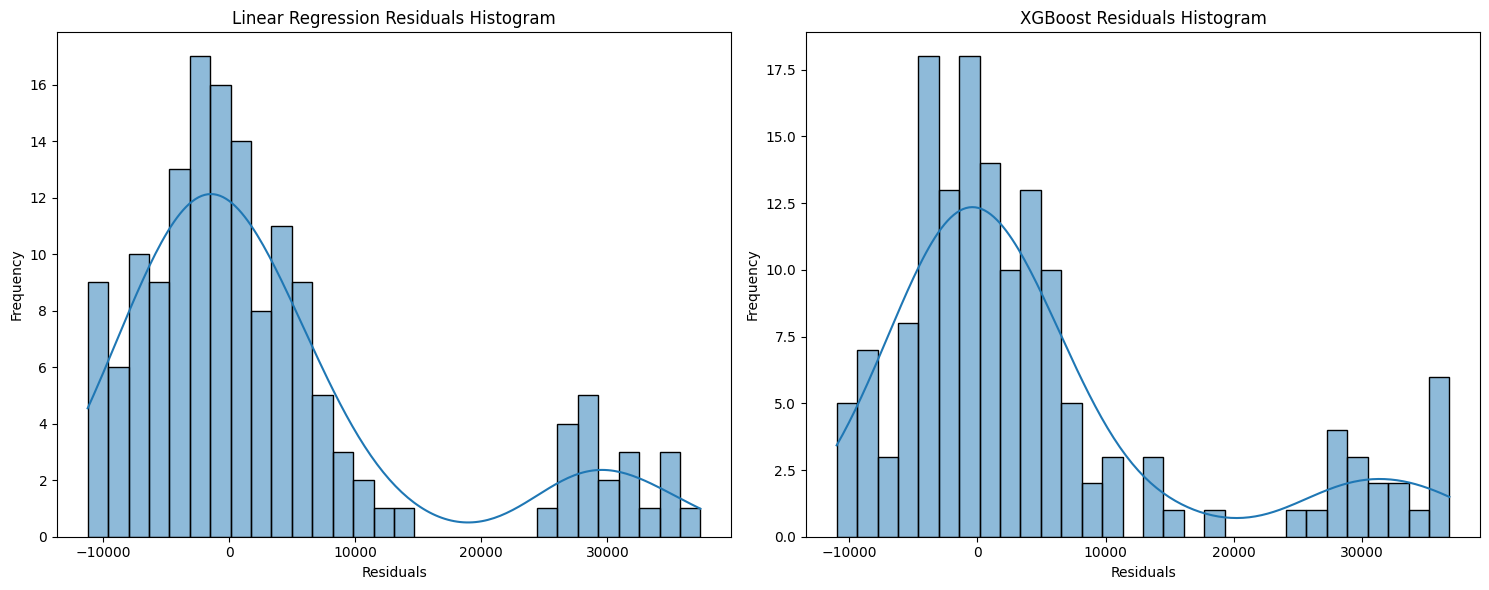

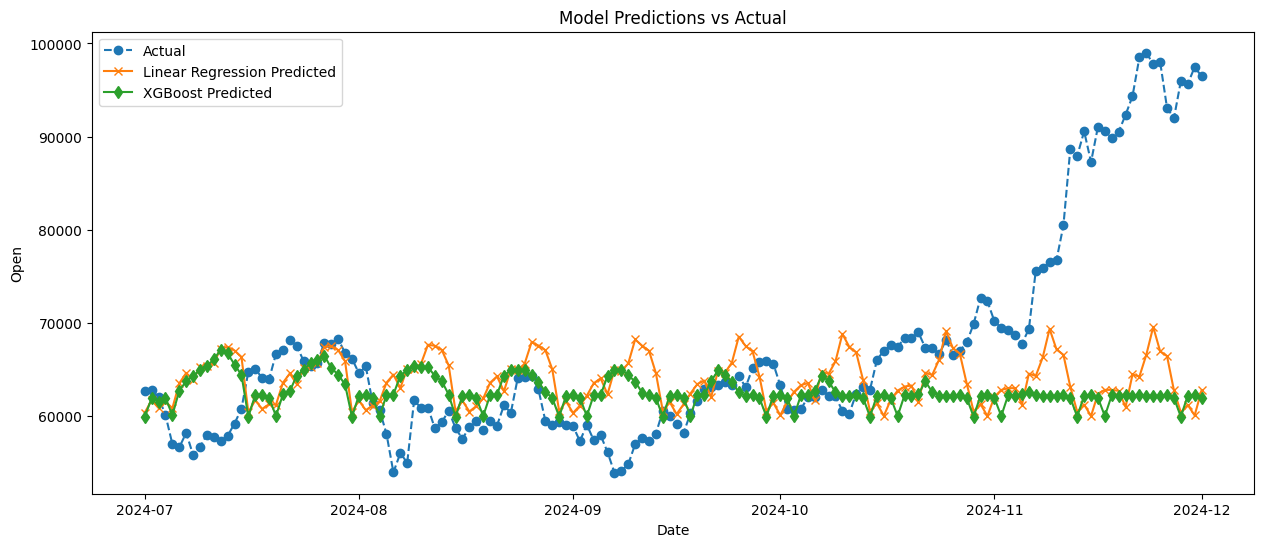

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(residualsLr, kde=True, bins=30, ax=axes[0])
axes[0].set_title('Linear Regression Residuals Histogram')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

sns.histplot(residualsXgb, kde=True, bins=30, ax=axes[1])
axes[1].set_title('XGBoost Residuals Histogram')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(testData.index, testY, label='Actual', linestyle='--', marker='o')
plt.plot(testData.index, predY_lr, label='Linear Regression Predicted', marker='x')
plt.plot(testData.index, predY_xgb, label='XGBoost Predicted', marker='d')
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Model Predictions vs Actual')
plt.legend()
plt.show()


### Analysis of output data

 Overall, both algorithms were not able to output accurate predicitons of Bitcoin prices, with the XGBoost model having a higher MSE and lower R^2 values, while having a slightly better MAE compared to the linear model.

 Using cross validation, both models were able to predict Bitcoin prices from July to October of this year, through struggles immensely with sudden, intense changes over a short period.

 Displayed above, both the linear and XGBoost models essentially did not react to the sharp increase in Bitcoing prices in November in the slightest, resulting in some extremely high MSE and MAE values.

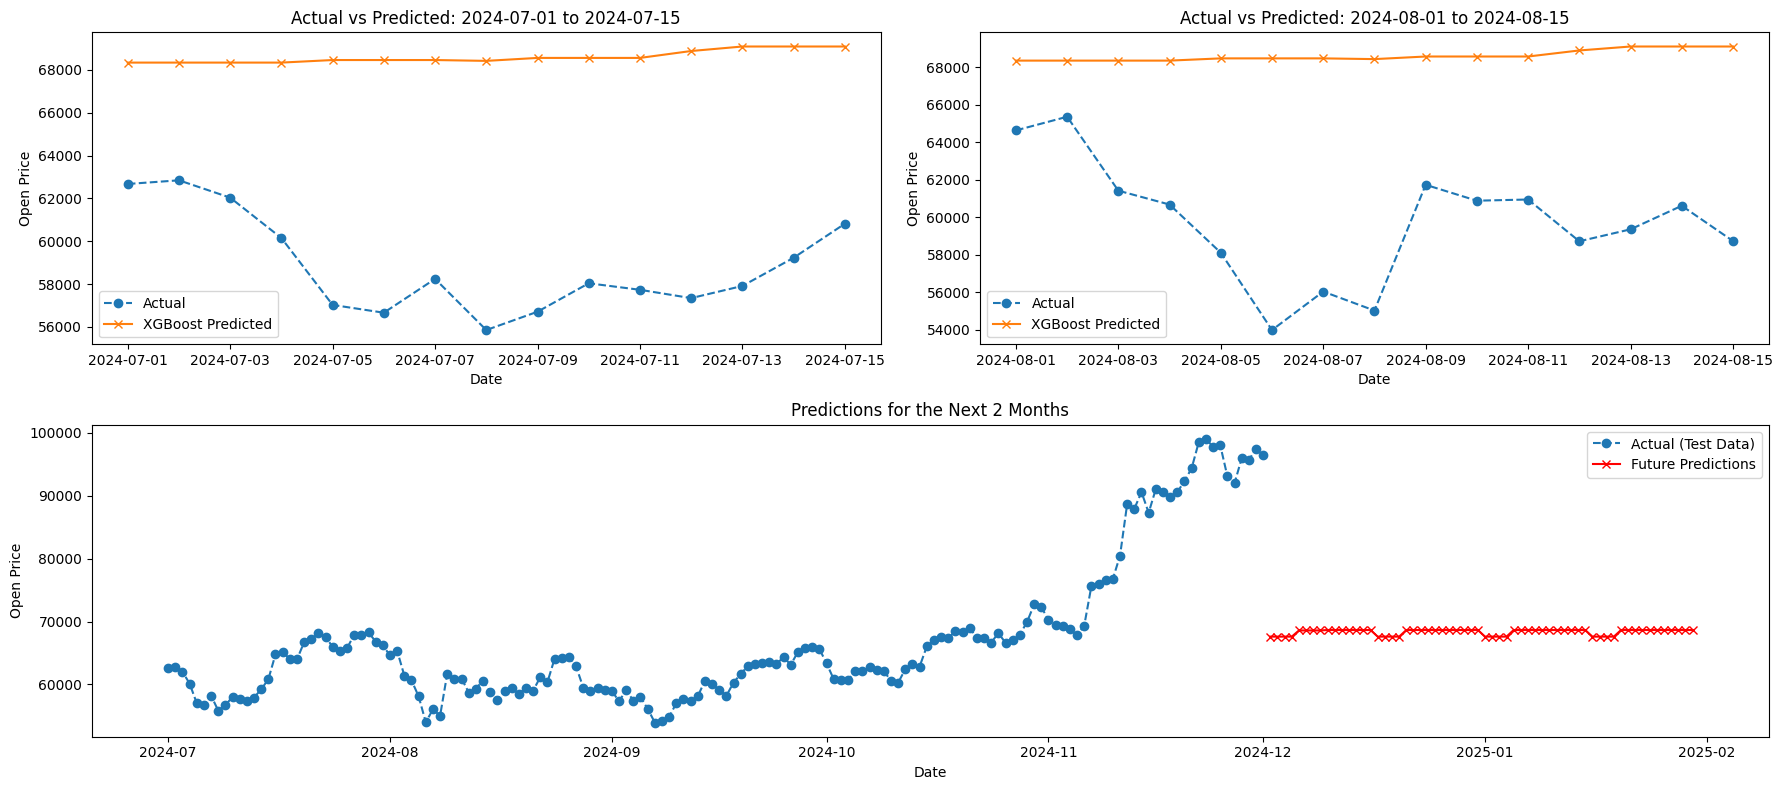

In [ ]:
from datetime import timedelta

timeFrame_1 = ('2024-07-01', '2024-07-15')
timeFrame_2 = ('2024-08-01', '2024-08-15')
forecastDays = 60  # next 2 months

testData_1 = testData[(testData.index >= timeFrame_1[0]) & (testData.index <= timeFrame_1[1])]
testData_2 = testData[(testData.index >= timeFrame_2[0]) & (testData.index <= timeFrame_2[1])]

# predictions for timeFrame_1
testY_1 = testData_1['Open'].values
lastKnown_data = scalerX.transform(testData[lagged_features].values)[-1].reshape(1, -1)  # Starting point
predY_xgb_1 = []
for _ in range(len(testData_1)):
    nextPrediction_scaled = best_xgbModel.predict(lastKnown_data)[0]
    predY_xgb_1.append(nextPrediction_scaled)
    newLagged = np.roll(lastKnown_data, -1, axis=1)  # Shift
    newLagged[0, -1] = nextPrediction_scaled
    lastKnown_data = newLagged
predY_xgb_1 = scalerY.inverse_transform(np.array(predY_xgb_1).reshape(-1, 1)).flatten()

# predictions for timeFrame_2
testY_2 = testData_2['Open'].values
lastKnown_data = scalerX.transform(testData[lagged_features].values)[-1].reshape(1, -1)  # Reset starting point
predY_xgb_2 = []
for _ in range(len(testData_2)):
    nextPrediction_scaled = best_xgbModel.predict(lastKnown_data)[0]
    predY_xgb_2.append(nextPrediction_scaled)
    newLagged = np.roll(lastKnown_data, -1, axis=1)  # Shift
    newLagged[0, -1] = nextPrediction_scaled
    lastKnown_data = newLagged
predY_xgb_2 = scalerY.inverse_transform(np.array(predY_xgb_2).reshape(-1, 1)).flatten()

# predictions for next 2 months
futurePredictions_scaled = []
for _ in range(forecastDays):
    nnextPrediction_scaled = best_xgbModel.predict(lastKnown_data)[0]
    futurePredictions_scaled.append(nextPrediction_scaled)
    newLagged = np.roll(lastKnown_data, -1, axis=1)  # Shift
    newLagged[0, -1] = nextPrediction_scaled
    lastKnown_data = newLagged
futurePredictions = scalerY.inverse_transform(np.array(futurePredictions_scaled).reshape(-1, 1)).flatten()

lastDate = testData.index[-1]
futureDates = [lastDate + timedelta(days=i + 1) for i in range(forecastDays)]

plt.figure(figsize=(18, 8))

# plot: timeFrame_1
plt.subplot(2, 2, 1)
plt.plot(testData_1.index, testY_1, label='Actual', linestyle='--', marker='o')
plt.plot(testData_1.index, predY_xgb_1, label='XGBoost Predicted', marker='x')
plt.title(f'Actual vs Predicted: {timeFrame_1[0]} to {timeFrame_1[1]}')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# plot: timeFrame_2
plt.subplot(2, 2, 2)
plt.plot(testData_2.index, testY_2, label='Actual', linestyle='--', marker='o')
plt.plot(testData_2.index, predY_xgb_2, label='XGBoost Predicted', marker='x')
plt.title(f'Actual vs Predicted: {timeFrame_2[0]} to {timeFrame_2[1]}')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# plot: next 2 months
plt.subplot(2, 1, 2)
plt.plot(testData.index, testData['Open'], label='Actual (Test Data)', linestyle='--', marker='o')
plt.plot(futureDates, futurePredictions, label='Future Predictions', marker='x', color='red')
plt.title('Predictions for the Next 2 Months')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

plt.tight_layout()
plt.show()

## Result

The above two graphs provide a closer analysis of the output of XGBoost compared to actual data on a daily basis.

Below is the the prediction of the next 3 months of Bitcoing prices from the XGBoost algorithm.

Once again, the XGBoost model essentially did not react to any changes in Bitcoing prices, resulting in some extremely high MSE and MAE values. This is likely an issue of not having enough data, or speaks to the volatility of Bitcoing being impossible to track computationally, and requires human analysis and intuition instead.

Overall, XGBoost outputs almost a linear price prediction with little variance, which juxaposes the volatile nature of Bitcoin. This is likely due to not having enough data.

---

# **Conclusions**




## Summary of Findings

Our project investigated the potential of predicting Bitcoin prices by analyzing historical trends and market sentiment, utilizing auxiliary metrics such as the prices of Ethereum, gold, and inflation rates. By modifying the XGBoost algorithm, we aimed to capture key influences on Bitcoin's price movements. However, we found that the highly volatile nature of Bitcoin makes accurate predictions challenging, as the model tended toward stable price predictions over multiple months and struggled with sudden market shifts. The cryptocurrency market can change rapidly due to factors like news articles or political events involving influential figures. For instance, the recent election of Donald Trump significantly impacted Bitcoin, leading to a new highest price being recorded. Thus we cannot say we were successful in predicting bitcoin prices based on the aforementioned metrics but did demonstrate that the concept itself feasible.

## Real-World Implications

Despite these challenges, our work provides a valuable tool for investors seeking to make data-driven decisions. By forecasting Bitcoin prices based on historical patterns and market sentiment, our model can inform investment strategies and help assess risks in the volatile cryptocurrency market. This approach empowers investors to navigate the unpredictable landscape of cryptocurrency trading with greater confidence. As well the tool can be seen more as a tool for measuring general market sentiment even if it doesn’t succeed at predicting bitcoin prices.

## Future Directions

To build upon this project, future efforts could focus on incorporating data on war sentiment and political developments from platforms like Twitter to enhance prediction accuracy. While this information is difficult to quantify and integrate into models, it could provide deeper insights into market dynamics. Additionally, expanding our dataset with more extensive historical data would likely improve model performance but this is difficult due to Bitcoin being a new technology.

As well Addressing computational limitations by accessing more powerful computing resources would enable us to fully utilize advanced algorithms. As a small team of four students new to machine learning, this project was a valuable introduction to predictive AI, and we understand that the problem we approach is a difficult one as major corporations with far greater resources are actively trying to tackle it. Overall, this gave us a deeper understanding into both the limitations and advantages of AI in the financial field and was informative in helping understand class concepts


---

# **Bibliography**

Crypto Fear and Greed Index API
https://alternative.me/crypto/fear-and-greed-index/
https://api.alternative.me/fng/?limit=3650

Federal Reserve Bank Of St. Louis
https://fred.stlouisfed.org/tags/series?t=inflation
https://api.stlouisfed.org/fred/series/observations

Yahoo Finance Public Library
https://pypi.org/project/yfinance/

xgboost
https://xgboost.readthedocs.io/en/stable/

scikit-learn
https://scikit-learn.org/stable/


---